## Emissão diária de poluentes na cidade de São Paulo, de 1 de janeiro a 31 de dezembro de 1997 (CO)

In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

series = pd.read_csv('Database/a6_poluicao.csv', header=0, parse_dates=True, index_col=0, squeeze=True, usecols=['DATA', 'co'])
series.head()

DATA
1997-01-01       1.7133
1997-01-02       1.6083
1997-01-03       1.8983
1997-01-04    1675.0000
1997-01-05    2012.0000
Name: co, dtype: float64

**Separando os dados para treino, teste e validação**

Vamos separar dois arquivos fisicos:

  - **dataset_co.csv**: Dados de Janeiro de 1997 a Novembro de 1997.

  - **validation_co.csv**: Dados de Dezembro de 1997.

In [2]:
# pega a quantidade de linhas e subtrai por 12
split_point = len(series) - 31

In [3]:
# define que a variável dataset vai conter linhas até o split_point
dataset_co = series[0:split_point]

In [4]:
# define que a variável validation terá os dados do split_point em diante
validation_co = series[split_point:]

In [5]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset_co), len(validation_co)))

Dataset 334, Validation 31


In [6]:
# escreve para o disco
dataset_co.to_csv('Database/dataset_co.csv')

In [7]:
# escreve para o disco.
validation_co.to_csv('Database/validation_co.csv')

## **Análise com Prophet**

In [8]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset_co.index, 
                          'y': dataset_co.values})

In [9]:
# dataframe do prophet
dataframe.head()

,ds,y
0,1997-01-01,1.7133
1,1997-01-02,1.6083
2,1997-01-03,1.8983
3,1997-01-04,1675.0000
4,1997-01-05,2012.0000


In [10]:
# instancia o objeto prophet
model = Prophet()

In [11]:
# gerando o modelo
model.fit(dataframe)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# gerando dados futuros
future = model.make_future_dataframe(periods = 12, freq='M')

In [13]:
future

,ds
0,1997-01-01
1,1997-01-02
2,1997-01-03
3,1997-01-04
4,1997-01-05
...,...
341,1998-07-31
342,1998-08-31
343,1998-09-30
344,1998-10-31


In [14]:
# prevendo valores para dados futuros
out = model.predict(future)

In [15]:
# imprime saidas
out.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-01,379.728866,-841.393141,1480.493645,379.728866,379.728866,-57.457575,-57.457575,-57.457575,-57.457575,-57.457575,-57.457575,0.0,0.0,0.0,322.271291
1,1997-01-02,378.714395,-686.643942,1540.373880,378.714395,378.714395,89.658864,89.658864,89.658864,89.658864,89.658864,89.658864,0.0,0.0,0.0,468.373259
2,1997-01-03,377.699924,-753.703498,1458.923082,377.699924,377.699924,-68.529984,-68.529984,-68.529984,-68.529984,-68.529984,-68.529984,0.0,0.0,0.0,309.169940
3,1997-01-04,376.685453,-777.919107,1450.768633,376.685453,376.685453,-83.089666,-83.089666,-83.089666,-83.089666,-83.089666,-83.089666,0.0,0.0,0.0,293.595787
4,1997-01-05,375.670982,-851.436492,1458.751999,375.670982,375.670982,-42.673926,-42.673926,-42.673926,-42.673926,-42.673926,-42.673926,0.0,0.0,0.0,332.997056


In [16]:
out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
339,1998-05-31,96.482225,-1003.815044,1183.980943
340,1998-06-30,173.586611,-996.113024,1405.553946
341,1998-07-31,57.918060,-1036.374431,1177.594422
342,1998-08-31,241.401762,-827.146716,1384.586045
343,1998-09-30,56.282361,-1099.261620,1164.654185
344,1998-10-31,24.192051,-1112.389233,1160.468896
345,1998-11-30,222.443765,-1007.364022,1300.095599


**Validando o modelo com Prophet**

In [17]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation_co.index})

In [18]:
# dados temporais
validation_df['ds']

0    1997-12-01
1    1997-12-02
2    1997-12-03
3    1997-12-04
4    1997-12-05
5    1997-12-06
6    1997-12-07
7    1997-12-08
8    1997-12-09
9    1997-12-10
10   1997-12-11
11   1997-12-12
12   1997-12-13
13   1997-12-14
14   1997-12-15
15   1997-12-16
16   1997-12-17
17   1997-12-18
18   1997-12-19
19   1997-12-20
20   1997-12-21
21   1997-12-22
22   1997-12-23
23   1997-12-24
24   1997-12-25
25   1997-12-26
26   1997-12-27
27   1997-12-28
28   1997-12-29
29   1997-12-30
30   1997-12-31
Name: ds, dtype: datetime64[ns]

In [19]:
# aplicando o modelo do prophet
out = model.predict(validation_df)

In [20]:
# imprime as saidas
out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1997-12-01,298.275754,-795.250401,1410.360694
1,1997-12-02,217.335835,-853.825624,1333.240600
2,1997-12-03,118.989583,-944.439019,1289.619150
3,1997-12-04,265.897692,-900.974994,1422.057499
4,1997-12-05,107.500514,-971.715317,1284.101677
5,1997-12-06,92.732502,-1139.329392,1259.758733
6,1997-12-07,132.939912,-1024.905035,1277.720710
7,1997-12-08,296.817447,-792.627348,1458.290847
8,1997-12-09,215.877528,-967.738187,1267.142108
9,1997-12-10,117.531275,-1050.334634,1161.599648


In [21]:
validation_co

DATA
1997-12-01       4.2567
1997-12-02    4205.0000
1997-12-03       3.7400
1997-12-04       4.6043
1997-12-05       3.9471
1997-12-06       3.2186
1997-12-07       2.3843
1997-12-08       3.0114
1997-12-09       2.7043
1997-12-10       2.3886
1997-12-11       2.3200
1997-12-12       3.2071
1997-12-13       3.8157
1997-12-14       3.2986
1997-12-15       3.3000
1997-12-16       3.2729
1997-12-17       1.8714
1997-12-18       2.9071
1997-12-19       3.5743
1997-12-20       3.5800
1997-12-21       3.2033
1997-12-22       3.9433
1997-12-23       3.8229
1997-12-24       3.4229
1997-12-25       1.5600
1997-12-26       2.2143
1997-12-27       2.1571
1997-12-28       1.8914
1997-12-29       2.9000
1997-12-30       3.1086
1997-12-31       2.6617
Name: co, dtype: float64

In [22]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_co.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 740.070


**Prevendo o futuro**

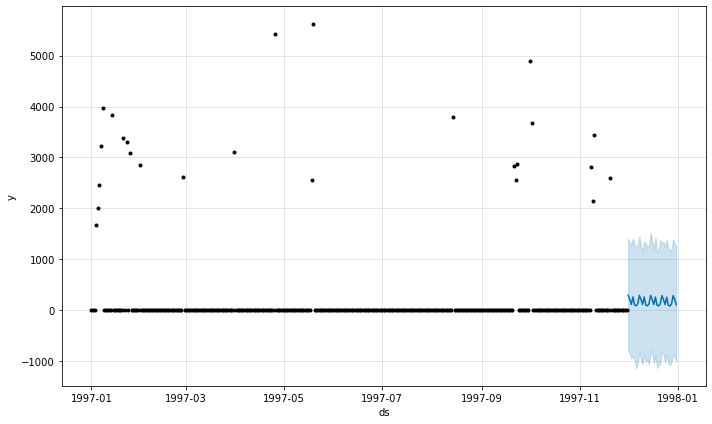

In [23]:
# Python
figure = model.plot(out)

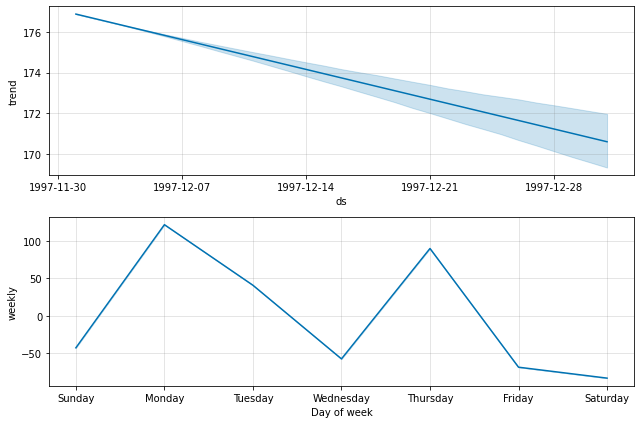

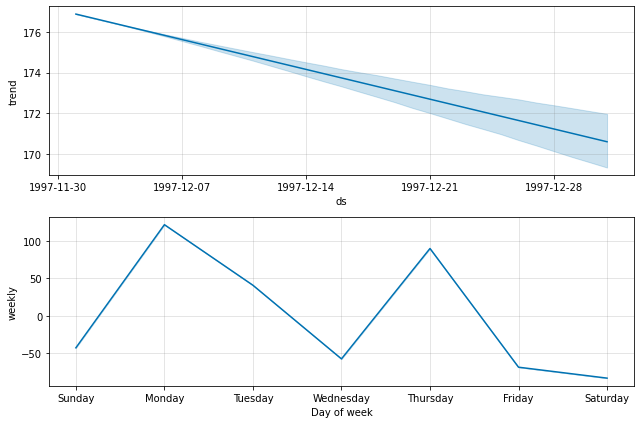

In [24]:
model.plot_components(out)

In [25]:
dataframe = pd.DataFrame({'ds': dataset_co.index, 'y': dataset_co.values})

In [26]:
dataframe

,ds,y
0,1997-01-01,1.7133
1,1997-01-02,1.6083
2,1997-01-03,1.8983
3,1997-01-04,1675.0000
4,1997-01-05,2012.0000
...,...,...
329,1997-11-26,2.8729
330,1997-11-27,3.6771
331,1997-11-28,3.3367
332,1997-11-29,2.1383


Alterando o modo de sazonalidade

In [27]:
model = Prophet(seasonality_mode='multiplicative')

In [28]:
model.fit(dataframe)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
validation_df = pd.DataFrame({'ds': validation_co.index})

In [30]:
out = model.predict(validation_df)

In [31]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_co.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 746.701


Alterando tipos de sazonalidade

In [32]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False)

In [33]:
model.fit(dataframe)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [34]:
# imprime a sazonalidade habilitada
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [35]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation_co.index})

In [36]:
# prevendo dados
out = model.predict(validation_df)

In [37]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_co.values, out.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 746.701
